<a href="https://colab.research.google.com/github/ingcarlosleon/techsprint/blob/main/Caso_de_Uso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**TechSprint para una mayor transparencia gubernamental**

📑 **Planteamiento del problema 4:** ¿Cómo podemos mejorar la identificación de brechas en infraestructuras y desarrollo en la planificación de inversiones públicas y privadas para apoyar la resiliencia climática, la igualdad de género, la buena gobernanza y el desarrollo sostenible?

📘 **Más sobre el problema:** https://idb-air-techsprint.vercel.app/problem-statements/planteamiento-del-problema-4

📚 **Equipo:** 2

🧑 **Integrantes:**
> Alice Raquel Rambo

> David Arnaldo	Durand Velasquez

> Doug McCalmont

> Milton Javier Mahecha Silva

> Carlos Julio León Caicedo

👩 **Mentores BID**:
> Carole Alazki (**Product Owner**)

> Anyela Milena (**Arquitecta de Datos**)

📅 Agosto de 2024
---

**Propuesta de Cruzamiento de Información (x Ajustar):**


*   Análisis de Gasto Público vs. Necesidades de Infraestructura: Comparar el gasto público en infraestructura (de MOF Jamaica) con las necesidades de desarrollo identificadas a través de datos socioeconómicos y ambientales (Data.gov.jm y Datos.gob.ar).

*   Identificación de Brechas Geoespaciales: Utilizar los datos geoespaciales de IDERA y Data.gov.jm para mapear regiones con brechas significativas en infraestructura. Relacionar estas brechas con indicadores de resiliencia climática y equidad de género.

*   Comparación y Evaluación de Directrices de Inversión: Comparar las directrices de planificación de infraestructura de PRIF NIIP con las inversiones actuales en Jamaica y Argentina para identificar áreas donde las inversiones podrían mejorar la resiliencia climática y la igualdad de género.

*    Evaluación de Impacto en la Equidad: Cruzar el Índice de Inequidades en la Primera Infancia con los planes de inversión en infraestructura para asegurar que las inversiones apoyen la reducción de inequidades desde la infancia.

In [54]:
!pip install pandas requests frictionless

🚀 **Fase 1. Análisis exploratorio de datos (EDA)**: Elegir las características más relevantes para reducir la dimensionalidad y aumentar la capacidad de generalización del modelo a desarrollar. Abordar y corregir los problemas identificados en los datos. Realizar un análisis de los conjuntos de datos y columnas existentes contestando las siguientes preguntas:

*   ¿Cuáles son las estadísticas resumidas del conjunto de datos?
*   ¿Hay valores faltantes en el conjunto de datos?
*   ¿Se pueden identificar patrones de ausencia?
*   ¿Hay valores atípicos en el conjunto de datos?
*   ¿Cuál es la cardinalidad de las variables categóricas?
*   ¿Existen distribuciones sesgadas en el conjunto de datos?
*   ¿Necesitamos aplicar alguna transformación no lineal?
*   ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
*   ¿Hay correlación entre las variables dependientes e independientes?
*   ¿Cómo se distribuyen los datos en función de diferentes categorías?
*   ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
*   ¿Hay desequilibrio en las clases de la variable objetivo?

###**Analísis de los Conjuntos de Datos de Argentina**



**Obtener los Datos**: Cargamos los tres conjuntos de datos desde las fuentes CSV.

Fuente: https://idb-air-techsprint.vercel.app/datasets/investment-projects-and-works-arg

In [55]:
import pandas as pd
import requests
from io import StringIO

# URLs de los datasets desde el JSON
url_spatial_data_works = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/OBRAS/CSV/2024/06/19/dataset_mop.csv"
url_investment_projects = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/PROYECTOS/CSV/2024/06/19/dataset_proyectosmop.csv"
url_datos_espaciales = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/DATOS_ESPACIALES/CSV/2024/06/25/dataset_geojson.csv"

# Función para cargar los datasets desde la URL
def load_csv_from_url(url):
    response = requests.get(url)
    response.raise_for_status()  # Nos Aseguramos que la solicitud fue exitosa
    data = response.content.decode('utf-8')
    return pd.read_csv(StringIO(data))

# Cargar los datasets en DataFrames de pandas
df_spatial_data_works = load_csv_from_url(url_spatial_data_works)
df_investment_projects = load_csv_from_url(url_investment_projects)
df_datos_espaciales = load_csv_from_url(url_datos_espaciales)

**Dataset: Datos espaciales - Obras de la República Argentina (spatial-data-works)**



**<center>🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>**

In [56]:
# Obtener información general sobre el DataFrame
df_spatial_data_works.info()
print("\nSpatial Data Works - Describe\n")
df_spatial_data_works.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idproyecto                      7317 non-null   int64  
 1   numeroobra                      7317 non-null   object 
 2   codigobapin                     7317 non-null   object 
 3   fechainicioanio                 7317 non-null   int64  
 4   fechafinanio                    7317 non-null   int64  
 5   nombreobra                      7317 non-null   object 
 6   descripicionfisica              7317 non-null   object 
 7   montototal                      7317 non-null   float64
 8   sectornombre                    7317 non-null   object 
 9   avancefinanciero                7317 non-null   float64
 10  avancefisico                    7317 non-null   float64
 11  entidadejecutoranombre          7317 non-null   object 
 12  duracionobrasdias               73

,idproyecto,fechainicioanio,fechafinanio,montototal,avancefinanciero,avancefisico,duracionobrasdias,codigo_bahra,organismo_financiador_prestamo
count,7.317000e+03,7317.000000,7317.000000,7.317000e+03,7317.000000,7317.000000,7317.000000,3.977000e+03,2.100000e+02
mean,7.230890e+08,2021.288916,2022.269373,5.918530e+08,71.909481,74.819638,351.468908,2.927189e+14,7.117020e+07
std,4.488914e+08,1.604703,1.181463,3.175574e+09,33.753074,35.889589,491.368452,3.037337e+14,5.210177e+08
min,1.610000e+03,2008.000000,2020.000000,1.000000e+00,0.000000,0.000000,1.000000,2.007000e+03,2.280000e+03
25%,1.001445e+07,2021.000000,2021.000000,1.154832e+07,45.170000,48.920000,120.000000,6.294029e+13,2.940000e+03
50%,1.003112e+09,2021.000000,2022.000000,3.604513e+07,90.000000,100.000000,181.000000,1.410527e+14,8.945000e+03
75%,1.003120e+09,2022.000000,2023.000000,1.637773e+08,100.000000,100.000000,386.000000,5.404902e+14,8.945000e+03
max,1.003131e+09,2024.000000,2029.000000,9.408170e+10,100.000000,100.000000,5568.000000,9.401400e+14,4.312100e+09


**<center>🤔¿Hay valores faltantes en el conjunto de datos?</center>**

In [57]:
#Verificamos si existen valores faltantes en nuestro conjunto
print("¿Hay valores faltantes en el conjunto de datos spatial-data-works?")
if (df_spatial_data_works.isna().values.any())==True:
  print("Sí")
else:
  print("No")

¿Hay valores faltantes en el conjunto de datos spatial-data-works?
Sí


In [58]:
import pandas as pd
# Calcular la cantidad de valores faltantes por columna
missing_values = df_spatial_data_works.isnull().sum()

# Filtrar las columnas con valores faltantes
missing_columns = missing_values[missing_values > 0]

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_columns / len(df_spatial_data_works)) * 100

# Crear un DataFrame para mostrar los resultados
missing_data = pd.DataFrame({
    'Columna': missing_columns.index,
    'Valores Faltantes': missing_columns.values,
    'Porcentaje Faltante': missing_percentage.values
})

# Ordenar el DataFrame por porcentaje faltante en orden descendente
missing_data_sorted = missing_data.sort_values('Porcentaje Faltante', ascending=False)

# Mostrar el DataFrame ordenado
print(missing_data_sorted)

                          Columna  Valores Faltantes  Porcentaje Faltante
1         organismo_financiador_2               7312            99.931666
2  organismo_financiador_prestamo               7107            97.129971
0                    codigo_bahra               3340            45.647123
4                 contraparte_val                225             3.075031
3                 contraparte_key                182             2.487358
5                contraparte_cuit                182             2.487358
6           contraparte_modalidad                182             2.487358


Se presentan algunos valores faltantes de las columnas organismo_financiador_2, organismo_financiador_prestamo, entre otras que van desde el 99.93% hasta el 2.48%, a continuación se realiza un gráfico de barras para analizar las columnas con datos faltantes.

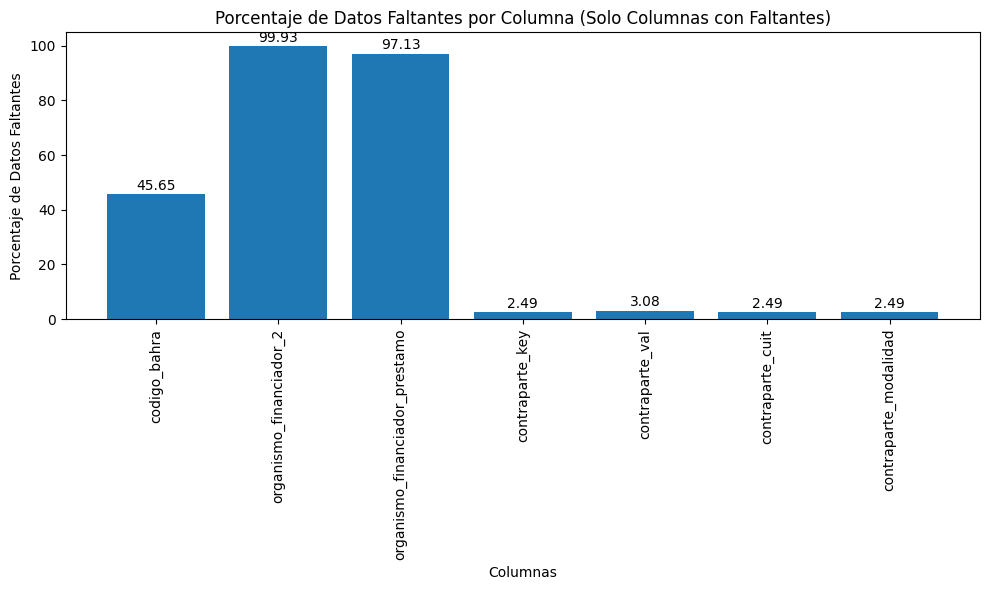

In [59]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de datos faltantes por columna
missing_percentage = df_spatial_data_works.isnull().sum() * 100 / len(df_spatial_data_works)

# Filtrar las columnas con datos faltantes
missing_percentage_filtered = missing_percentage[missing_percentage > 0]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentage_filtered.index, missing_percentage_filtered.values)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Datos Faltantes')
plt.title('Porcentaje de Datos Faltantes por Columna (Solo Columnas con Faltantes)')
plt.xticks(rotation=90)

# Agregar etiquetas con el valor faltante a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [60]:
missing_percentage_filtered.index

Index(['codigo_bahra', 'organismo_financiador_2',
       'organismo_financiador_prestamo', 'contraparte_key', 'contraparte_val',
       'contraparte_cuit', 'contraparte_modalidad'],
      dtype='object')

**<center>🤔¿Se pueden identificar patrones de ausencia?</center>**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0.5, 0, 'idproyecto'),
  Text(1.5, 0, 'numeroobra'),
  Text(2.5, 0, 'codigobapin'),
  Text(3.5, 0, 'fechainicioanio'),
  Text(4.5, 0, 'fechafinanio'),
  Text(5.5, 0, 'nombreobra'),
  Text(6.5, 0, 'descripicionfisica'),
  Text(7.5, 0, 'montototal'),
  Text(8.5, 0, 'sectornombre'),
  Text(9.5, 0, 'avancefinanciero'),
  Text(10.5, 0, 'avancefisico'),
  Text(11.5, 0, 'entidadejecutoranombre'),
  Text(12.5, 0, 'duracionobrasdias'),
  Text(13.5, 0, 'objetivogeneral'),
  Text(14.5, 0, 'tipoproyecto'),
  Text(15.5, 0, 'nombredepto'),
  Text(16.5, 0, 'nombreprovincia'),
  Text(17.5, 0, 'codigo_bahra'),
  Text(18.5, 0, 'etapaobra'),
  Text(19.5, 0, 'tipomoneda'),
  Text(20.5, 0, 'url_perfil_obra'),
  Text(21.5, 0, 'programa_infraestructura'),
  Text(22.5, 0, 'organismo_financiador

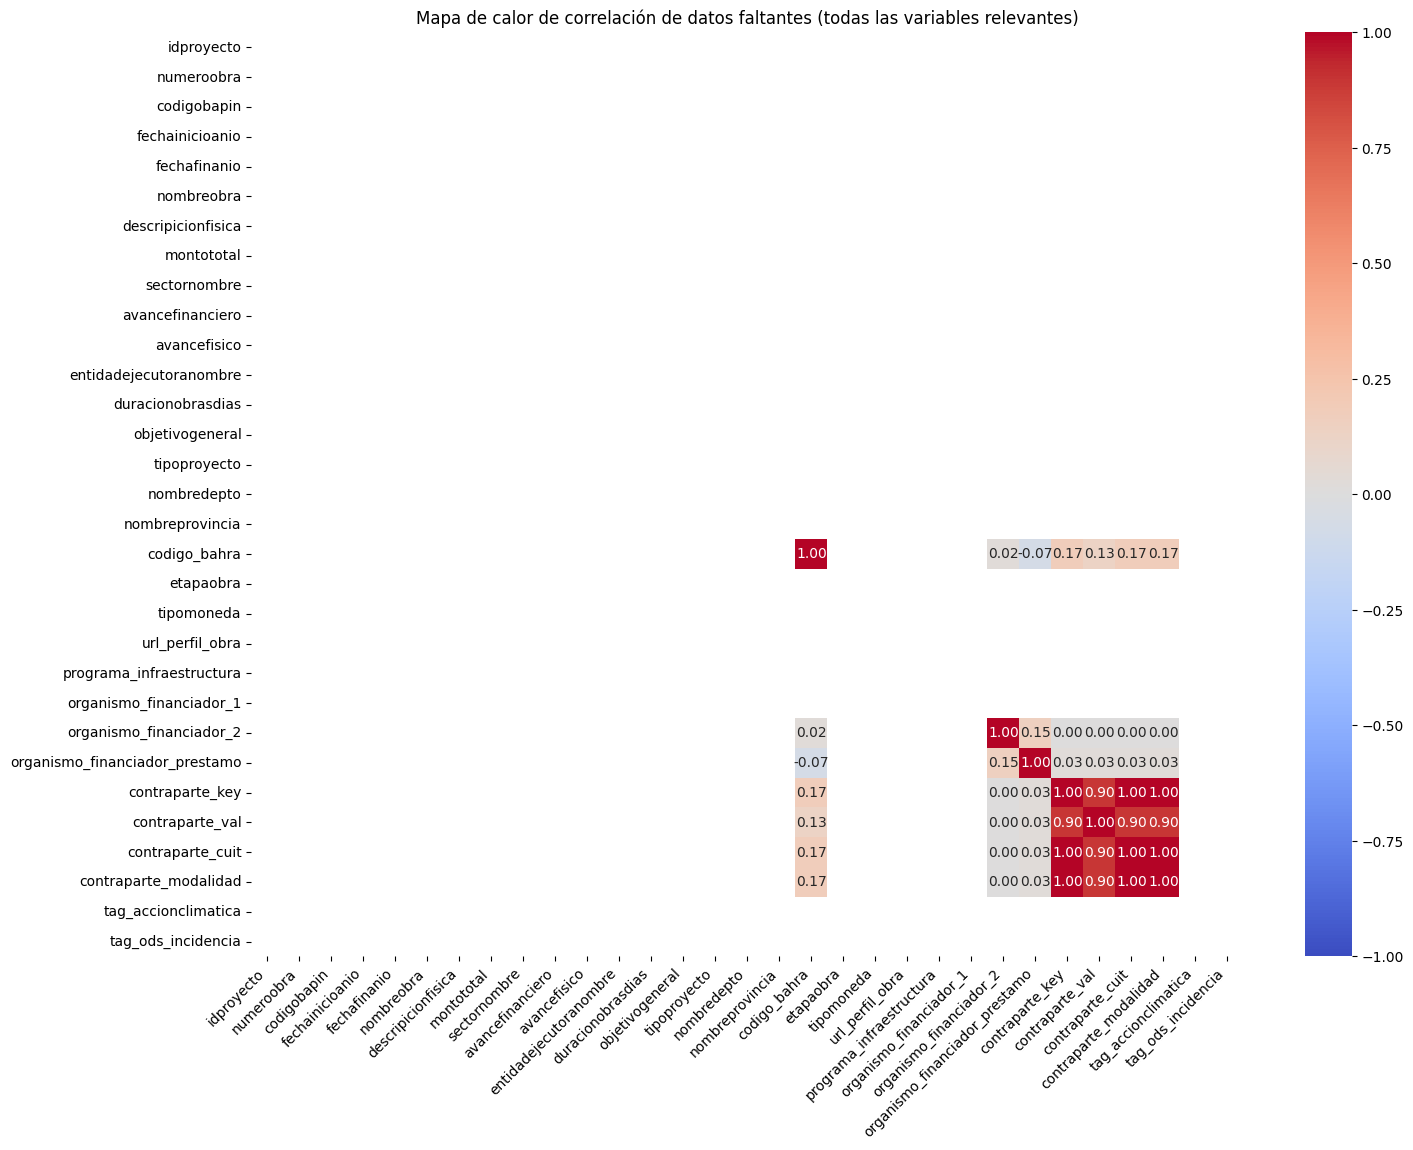

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de correlación de todas las variables relevantes con datos faltantes
Correlacion_Faltantes = df_spatial_data_works.isnull().corr()

# Aumentar el tamaño de la figura
plt.figure(figsize=(16, 12))

# Crear el mapa de calor con etiquetas rotadas en el eje X
sns.heatmap(Correlacion_Faltantes, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación de datos faltantes (todas las variables relevantes)')

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

La matriz de correlación de datos faltantes generada nos puede ayudar a identificar patrones de ausencia en los datos, si dos o más variables muestran una alta correlación en los datos faltantes (es decir valores cercanos a 1 o -1), indica que tienden a faltar juntas, lo que sugiere un patrón de ausencia.

Sin embargo, antes de eliminar variables, es importante considerar lo siguiente:

*   **Relevancia de las Variables:** Si las variables son críticas para el análisis, se puede intentar imputar los valores faltantes en lugar de eliminar las variables.
*   **Impacto en el Modelo:** Considerar cómo la eliminación afectará el análisis o modelo posterior. Variables altamente correlacionadas en términos de datos faltantes pueden estar relacionadas conceptualmente, lo que podría influir en los resultados.

*   **Análisis Exploratorio:** Continuar con el análisis exploratorio, para determinar si la eliminación de estas variables realmente mejora la calidad de los datos y la interpretación de los resultados.


**<center>🤔¿Hay valores atípicos en el conjunto de datos?</center>**

**<center>🤔¿Cuál es la cardinalidad de las variables categóricas?</center>**

**<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos?</center>**

**<center>🤔¿Necesitamos aplicar alguna transformación no lineal?</center>**

**<center>🤔¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).</center>**

**<center>🤔¿Hay correlación entre las variables dependientes e independientes?</center>**

**<center>🤔¿Cómo se distribuyen los datos en función de diferentes categorías</center>**

**<center>🤔¿Existen patrones o agrupaciones (clusters) en los datos con características similares?</center>**

**<center>🤔¿Hay desequilibrio en las clases de la variable objetivo?</center>**

###Proyectos de Inversión de la República Argentina - **Carlos Leon**

In [62]:

# Obtener información general sobre el DataFrame
df_investment_projects.info()

print("XXX")
df_investment_projects.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IdProyecto          630 non-null    int64  
 1   CodigoBapin         630 non-null    int64  
 2   NombreProyecto      630 non-null    object 
 3   Sector              630 non-null    object 
 4   Subsector           630 non-null    object 
 5   Tipo                630 non-null    object 
 6   CostoEstimado       630 non-null    float64
 7   FechaEstimacion     630 non-null    object 
 8   Responsable         630 non-null    object 
 9   Plan                630 non-null    object 
 10  Objetivo            133 non-null    object 
 11  Descripcion         630 non-null    object 
 12  NombreProvincia     630 non-null    object 
 13  NombreDepartamento  630 non-null    object 
 14  FechaCargueArchivo  630 non-null    object 
 15  FuenteDatos         630 non-null    object 
 16  url_perf

,IdProyecto,CodigoBapin,CostoEstimado
count,6.300000e+02,6.300000e+02,6.300000e+02
mean,1.001582e+09,1.328730e+05,1.085870e+09
std,3.956680e+07,4.460835e+04,8.926337e+09
min,1.003941e+07,0.000000e+00,2.775273e+06
25%,1.003151e+09,1.284070e+05,3.841979e+07
50%,1.003159e+09,1.363185e+05,7.500000e+07
75%,1.003170e+09,1.389670e+05,4.160132e+08
max,1.003176e+09,1.132632e+06,1.925820e+11


In [63]:

# Obtener información general sobre el DataFrame
df_spatial_data_works.info()

# Resumen estadístico de las columnas numéricas
df_datos_espaciales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idproyecto                      7317 non-null   int64  
 1   numeroobra                      7317 non-null   object 
 2   codigobapin                     7317 non-null   object 
 3   fechainicioanio                 7317 non-null   int64  
 4   fechafinanio                    7317 non-null   int64  
 5   nombreobra                      7317 non-null   object 
 6   descripicionfisica              7317 non-null   object 
 7   montototal                      7317 non-null   float64
 8   sectornombre                    7317 non-null   object 
 9   avancefinanciero                7317 non-null   float64
 10  avancefisico                    7317 non-null   float64
 11  entidadejecutoranombre          7317 non-null   object 
 12  duracionobrasdias               73

,IdVisorMapas,IdProyecto,Descripcion,ConsecutivoCarga
count,6996.000000,6.996000e+03,0.0,6996.0
mean,421801.500000,7.042445e+08,NaN,1.0
std,2019.715574,4.565424e+08,NaN,0.0
min,418304.000000,1.659500e+04,NaN,1.0
25%,420052.750000,1.001438e+07,NaN,1.0
50%,421801.500000,1.003112e+09,NaN,1.0
75%,423550.250000,1.003117e+09,NaN,1.0
max,425299.000000,1.003129e+09,NaN,1.0
